In [163]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile
#for POS
import nltk
import pandas as pd
import seaborn as sns
#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [43]:
nlp = spacy.load("en")

In [3]:
now_df = pd.read_table('data/small_sample.txt' ,header=0, encoding='gb2312', sep=',') 
now_df

,id,text,month,year
0,1563224,See Search Box lower down this column for sea...,7,10
1,1451590,"In fact , many in China still have n't figure...",4,10
2,1522539,It 's time for the youth of South Africa to g...,6,10
3,1367927,""" Warn your kids ! Better yet , home school t...",2,10
4,1408058,"TOKYO , Japan -- Late last year , the outspok...",3,10
...,...,...,...,...
3995,41011044,All praises and gratitude to Allah ( SWT ) wh...,5,19
3996,50632782,"' MAY you live in interesting times "" is an E...",4,19
3997,70378910,"On January 1 , 2019 , women in the state of K...",1,19
3998,61257561,Protesters take part in the Glabal Climate St...,9,19


True

In [28]:
now_df[now_df.year==10]

,id,text,month,year
0,1563224,See Search Box lower down this column for sea...,7,10
1,1451590,"In fact , many in China still have n't figure...",4,10
2,1522539,It 's time for the youth of South Africa to g...,6,10
3,1367927,""" Warn your kids ! Better yet , home school t...",2,10
4,1408058,"TOKYO , Japan -- Late last year , the outspok...",3,10
...,...,...,...,...
395,1346268,"It 's never a happy business when one has , r...",1,10
396,1555080,J. Christian Adams ' discredited accusations ...,7,10
397,1649640,"Boomers developed their "" forever young "" men...",9,10
398,1650381,"On Friday , prices go up . They go up all the...",9,10


In [29]:
# nowDF1: 2010, 2011, 2012
nowDF1 = now_df[now_df['year']==10]
nowDF1 = nowDF1.append(now_df[now_df['year']==11])
nowDF1 = nowDF1.append(now_df[now_df['year']==12])

In [32]:
# nowDF2: 2013-15
nowDF2 = now_df[now_df['year']==13]
nowDF2 = nowDF2.append(now_df[now_df['year']==14])
nowDF2 = nowDF2.append(now_df[now_df['year']==15])

In [31]:
# nowDF3: 2016-19
nowDF3 = now_df[now_df['year']==16]
nowDF3 = nowDF3.append(now_df[now_df['year']==17])
nowDF3 = nowDF3.append(now_df[now_df['year']==18])
nowDF3 = nowDF3.append(now_df[now_df['year']==19])

In [33]:
len(nowDF1), len(nowDF2), len(nowDF3)

(1200, 1200, 1600)

In [34]:
def token_normal_count(now_df):
    #tokenize and normalize
    now_df['tokenized_text'] = now_df['text'].apply(lambda x: lucem_illud.word_tokenize(x))
    now_df['normalized_tokens'] = now_df['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))
    # word count for each item
    now_df['normalized_tokens_count'] = now_df['tokenized_text'].apply(lambda x: len(x))
    return now_df

In [37]:
nowDF1 = token_normal_count(nowDF1)
nowDF2 = token_normal_count(nowDF2)
nowDF3 = token_normal_count(nowDF3)

In [38]:
#.sum() adds together the lists from each row into a single list
nowdist1 = nltk.ConditionalFreqDist(((len(w), w) for w in nowDF1['normalized_tokens'].sum()))
nowdist2 = nltk.ConditionalFreqDist(((len(w), w) for w in nowDF2['normalized_tokens'].sum()))
nowdist3 = nltk.ConditionalFreqDist(((len(w), w) for w in nowDF3['normalized_tokens'].sum()))


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [39]:
#POS
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [44]:
nowDF1['normalized_tokens_POS'] = [spacy_pos(t) for t in nowDF1['text']]
nowDF2['normalized_tokens_POS'] = [spacy_pos(t) for t in nowDF2['text']]
nowDF3['normalized_tokens_POS'] = [spacy_pos(t) for t in nowDF3['text']]


In [69]:
nowdist_WordtoPOS1 = nltk.ConditionalFreqDist(nowDF1['normalized_tokens_POS'].sum())
list(nowdist_WordtoPOS1.items())[:10]

[(' ', FreqDist({'_SP': 1200})),
 ('see', FreqDist({'VB': 985, 'VBP': 354, 'UH': 2, 'JJ': 1})),
 ('search', FreqDist({'NN': 88, 'VB': 7})),
 ('box', FreqDist({'NN': 55, 'NNP': 6})),
 ('lower', FreqDist({'JJR': 377, 'RBR': 23, 'VB': 22, 'VBP': 2})),
 ('down',
  FreqDist({'RP': 618, 'RB': 172, 'IN': 126, 'NN': 13, 'JJ': 5, 'NNP': 1})),
 ('this', FreqDist({'DT': 9611})),
 ('column', FreqDist({'NN': 81, 'NNP': 3})),
 ('for', FreqDist({'IN': 17754, 'CC': 2, 'RP': 1, 'RB': 1})),
 ('searches', FreqDist({'NNS': 6}))]

In [73]:
nowdist_POStoWord1 = nltk.ConditionalFreqDist((p, w) for w, p in nowDF1
                                             ['normalized_tokens_POS'].sum())

print(nowdist_POStoWord1['JJ'].most_common(20))
print(nowdist_POStoWord1['NN'].most_common(20))

[('other', 3143), ('many', 2650), ('social', 2403), ('economic', 2385), ('new', 2348), ('-', 2061), ('political', 1904), ('public', 1809), ('such', 1765), ('same', 1485), ('poor', 1286), ('good', 1234), ('high', 1222), ('first', 1213), ('last', 1212), ('own', 1189), ('human', 1142), ('national', 1065), ('much', 971), ('different', 949)]
[('government', 3149), ('world', 2554), ('time', 2372), ('inequality', 2109), ('country', 2107), ('state', 1905), ('income', 1877), ('way', 1843), ('year', 1789), ('education', 1750), ('@', 1707), ('%', 1660), ('system', 1531), ('society', 1509), ('work', 1418), ('percent', 1408), ('life', 1390), ('poverty', 1370), ('class', 1367), ('economy', 1284)]


In [74]:
nowdist_WordtoPOS2 = nltk.ConditionalFreqDist(nowDF2['normalized_tokens_POS'].sum())
list(nowdist_WordtoPOS2.items())[:10]

[(' ', FreqDist({'_SP': 1200})),
 ('berne', FreqDist({'NNP': 3})),
 ('  ', FreqDist({'_SP': 29670})),
 ('five', FreqDist({'CD': 452})),
 ('cent', FreqDist({'NN': 970})),
 ('coins', FreqDist({'NNS': 5})),
 ('are', FreqDist({'VBP': 10420})),
 ('pictured', FreqDist({'VBN': 16, 'VBD': 1})),
 ('in', FreqDist({'IN': 32765, 'RP': 340, 'RB': 129, 'NN': 18, 'FW': 1})),
 ('the', FreqDist({'DT': 90885}))]

In [75]:
nowdist_POStoWord2 = nltk.ConditionalFreqDist((p, w) for w, p in nowDF2
                                             ['normalized_tokens_POS'].sum())

print(nowdist_POStoWord2['JJ'].most_common(20))
print(nowdist_POStoWord2['NN'].most_common(20))

[('other', 2496), ('many', 2049), ('economic', 2022), ('new', 2011), ('social', 1862), ('political', 1616), ('public', 1588), ('such', 1418), ('-', 1324), ('same', 1072), ('first', 1044), ('last', 996), ('high', 989), ('own', 975), ('poor', 959), ('good', 862), ('global', 860), ('national', 857), ('black', 805), ('human', 779)]
[('government', 2566), ('inequality', 2178), ('time', 2122), ('world', 1998), ('income', 1705), ('education', 1662), ('country', 1640), ('state', 1639), ('year', 1593), ('way', 1401), ('@', 1363), ('%', 1359), ('poverty', 1278), ('work', 1200), ('system', 1195), ('growth', 1110), ('economy', 1100), ('life', 1098), ('policy', 1051), ('percent', 1017)]


In [76]:
nowdist_WordtoPOS3 = nltk.ConditionalFreqDist(nowDF3['normalized_tokens_POS'].sum())
list(nowdist_WordtoPOS3.items())[:10]

[(' ', FreqDist({'_SP': 1599})),
 ('australia', FreqDist({'NNP': 540, 'NNS': 4, 'NN': 3, 'JJ': 2})),
 ("'s", FreqDist({'POS': 11124, 'VBZ': 3970, 'PRP': 150, 'NNS': 2, 'NNP': 2})),
 ('equal', FreqDist({'JJ': 317, 'VB': 7, 'VBP': 2})),
 ('opportunity', FreqDist({'NN': 423, 'NNP': 1})),
 ('laws', FreqDist({'NNS': 299})),
 ('are', FreqDist({'VBP': 11536, 'VB': 1, 'NN': 1})),
 ('failing', FreqDist({'VBG': 98, 'NN': 4})),
 ('to', FreqDist({'TO': 33312, 'IN': 18875, 'NN': 3, 'RB': 1})),
 ('change', FreqDist({'NN': 992, 'VB': 417, 'VBP': 22, 'NNP': 5}))]

In [77]:
nowdist_POStoWord3 = nltk.ConditionalFreqDist((p, w) for w, p in nowDF3
                                             ['normalized_tokens_POS'].sum())

print(nowdist_POStoWord3['JJ'].most_common(20))
print(nowdist_POStoWord3['NN'].most_common(20))

[('other', 2754), ('many', 2359), ('new', 2353), ('economic', 2164), ('political', 2012), ('social', 2010), ('-', 1830), ('such', 1732), ('public', 1642), ('first', 1521), ('last', 1459), ('global', 1290), ('national', 1267), ('same', 1145), ('good', 1112), ('high', 1104), ('own', 1021), ('poor', 855), ('much', 820), ('free', 803)]
[('government', 3348), ('time', 2497), ('inequality', 2491), ('world', 2310), ('country', 2165), ('year', 2161), ('%', 1990), ('state', 1730), ('tax', 1704), ('@', 1577), ('income', 1575), ('way', 1518), ('policy', 1481), ('education', 1476), ('economy', 1357), ('growth', 1323), ('party', 1288), ('system', 1238), ('power', 1181), ('development', 1169)]


# WordCloud for each period of year

In [53]:
l_remove = ['say','year','people']

(-0.5, 499.5, 499.5, -0.5)

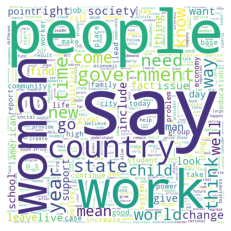

In [68]:
# wordcloud 1

wc1 = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(nowDF1['normalized_tokens'].sum()))
plt.imshow(wc1)
plt.axis("off")
#plt.savefig("wordcloud_DF1.pdf", format = 'pdf')

(-0.5, 499.5, 499.5, -0.5)

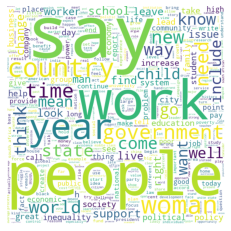

In [67]:
# wordcloud 2
wc2 = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(nowDF2['normalized_tokens'].sum()))
plt.imshow(wc2)
plt.axis("off")
#plt.savefig("wordcloud_DF2.pdf", format = 'pdf')


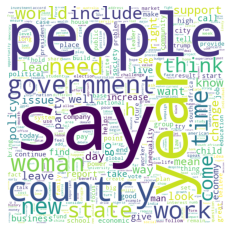

In [49]:
# wordcloud 3
wc3 = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(nowDF3['normalized_tokens'].sum()))
plt.imshow(wc3)
plt.axis("off")
#plt.savefig("wordcloud_DF3.pdf", format = 'pdf')

## Process and Analysis
There are some words not that meaning ful but too salient. We may delete some words to explore the pattern of other words. 

The topic/keywords seem to vary much more, not only focus on the previous keywords: woman, work, government, country.

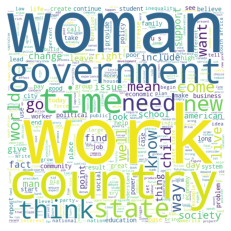

In [62]:
# wordcloud 1
delete1= nowDF1['normalized_tokens'].sum()
new_words = [word for word in delete1 if word not in l_remove]

wc1 = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(new_words))
plt.imshow(wc1)
plt.axis("off")
plt.savefig("wordcloud_DF1.pdf", format = 'pdf')

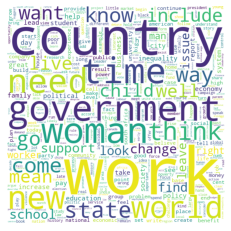

In [64]:
# wordcloud 2
delete2 = nowDF2['normalized_tokens'].sum()
new_words = [word for word in delete2 if word not in l_remove]

wc2 = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(new_words))
plt.imshow(wc2)
plt.axis("off")
plt.savefig("wordcloud_DF1.pdf", format = 'pdf')

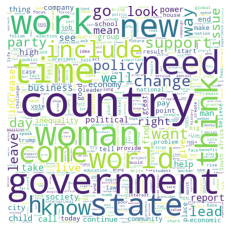

In [65]:
# wordcloud 3
delete3 = nowDF3['normalized_tokens'].sum()
new_words = [word for word in delete3 if word not in l_remove]

wc3 = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(new_words))
plt.imshow(wc3)
plt.axis("off")
plt.savefig("wordcloud_DF1.pdf", format = 'pdf')

# Part-of-Speech

In [78]:
def sent_tokenize(word_list):
    doc = nlp(word_list)
    sentences = [sent.string.strip() for sent in doc.sents]
    return sentences

In [81]:
def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [82]:
nowDF1['sentences'] = nowDF1['text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in sent_tokenize(x)])


In [131]:
nowDF2['sentences'] = nowDF2['text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in sent_tokenize(x)])
nowDF3['sentences'] = nowDF3['text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in sent_tokenize(x)])


In [83]:
nowDF1['POS_sents'] = nowDF1['sentences'].apply(lambda x: tag_sents_pos(x))


In [132]:
nowDF2['POS_sents'] = nowDF2['sentences'].apply(lambda x: tag_sents_pos(x))
nowDF3['POS_sents'] = nowDF3['sentences'].apply(lambda x: tag_sents_pos(x))


In [84]:
NTarget = 'JJ'
Word = 'woman'
NResults = set()
for entry in nowDF1['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)   

{'modern', 'inauthentic', 'elderly', 'young', 'ever', 'pregnant', 'black', 'American', 'pure', 'ideal', 'liberated', 'political', 'working', 'Dutch', 'nubile', 'Norwegian', 'Hispanic', 'other', 'married', 'superior', 'African', 'White', 'fat', 'real', 'Samaritan', 'Hutu', 'vulnerable', 'Arabian', 'particular', 'diminutive', 'successful', 'average', 'spiritual', 'token', 'accomplished', 'Muslim', 'Russian', 'sufficient', 'dutch', 'Noonuccal', 'old', 'serious', 'white', 'intelligent', 'professional', 'Modern', 'first', 'pathetic', 'Indian', 'ugly', 'seductive', 'poor', 'British', 'Hindu', 'major', 'talented', 'hoop', 'Anglican', 'strong', 'former', 'well', 'single', 'military', 'Ontarian', 'blind', 'progressive', 'naked', 'unemployed', 'brilliant'}


# Named-Entity Recognition


In [86]:
def tag_sents_ner(sentences):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [87]:
nowDF1['classified_sents'] = nowDF1['sentences'].apply(lambda x: tag_sents_ner(x))
nowDF2['classified_sents'] = nowDF2['sentences'].apply(lambda x: tag_sents_ner(x))
nowDF3['classified_sents'] = nowDF3['sentences'].apply(lambda x: tag_sents_ner(x))


0       [[(Box, PERSON), (Finfacts, NORP)], [(Interact...
1       [[(China, GPE), (eight years, DATE)], [(Has Hu...
2       [[(South Africa, GPE)], [(Joel Netshitenzhe, P...
3       [[(America, GPE), (Organizing for America, ORG...
4       [[(TOKYO Japan, ORG)], [(Late last year, DATE)...
                              ...                        
1195    [[(only 70 percent, PERCENT), (Americans, NORP...
1196    [[(The International Monetary Fund, ORG)], [(I...
1197    [[(this year, DATE), (season, DATE), (Benjamin...
1198    [[(September 6 2012, DATE), (Links Internation...
1199    [[(London, GPE), (Jewish, NORP), (Asian, NORP)...
Name: classified_sents, Length: 1200, dtype: object

In [160]:
def entity_count(nowDF1, par_kind):
    OrgCounts = {}
    for entry in nowDF1['classified_sents']:
        for sentence in entry:
            for ent, kind in sentence:
                if kind == par_kind:
                    #continue
                    if ent in OrgCounts:
                        OrgCounts[ent] += 1
                    else:
                        OrgCounts[ent] = 1
    sortedOrgObj = sorted(OrgCounts.items(), key = lambda x: x[1], reverse = True)
    return sortedOrgObj[:20]

def all_entity_count(nowDF1):
    entity_df = pd.DataFrame()
    # all entity
    entityCounts = {}
    for entry in nowDF1['classified_sents']:
        for sentence in entry:
            for ent, kind in sentence:
                if ent in entityCounts:
                    entityCounts[ent] += 1
                else:
                    entityCounts[ent] = 1
    sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
    allDF = pd.DataFrame(sortedEntities[:20], columns=['Entity','number'])
    # Organizations
    orgDF = pd.DataFrame(entity_count(nowDF1, par_kind = "ORG"), columns=['ORG','number'])
    # Geopolitical Entity
    gpeDF = pd.DataFrame(entity_count(nowDF1, par_kind = "GPE"), columns=['GPE','number'])
    # Nation, Race
    norpDF = pd.DataFrame(entity_count(nowDF1, par_kind = "NORP"), columns=['NORP','number'])
    # Law
    lawDF = pd.DataFrame(entity_count(nowDF1, par_kind = "LAW"), columns=['LAW','number'])
    return allDF, orgDF, gpeDF, norpDF, lawDF

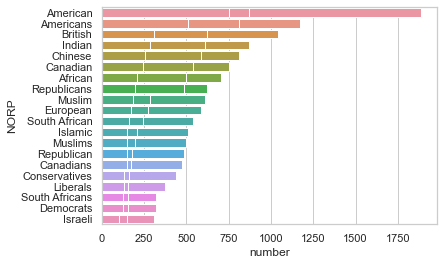

In [166]:
# ALl PoS plots for DF1
entities1=all_entity_count(nowDF1)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="number", y= "Entity", data=entities1[0])
ax = sns.barplot(x="number", y= "ORG", data=entities1[1])
ax = sns.barplot(x="number", y= "GPE", data=entities1[2])
ax = sns.barplot(x="number", y= "NORP", data=entities1[3])
#ax = sns.barplot(x="number", y= "LAW", data=entities1[4])


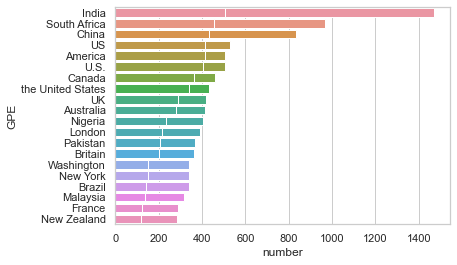

In [171]:
# ALl PoS plots for DF2
entities2=all_entity_count(nowDF2)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="number", y= "Entity", data=entities2[0])
ax = sns.barplot(x="number", y= "ORG", data=entities2[1])
ax = sns.barplot(x="number", y= "GPE", data=entities2[2])
#ax = sns.barplot(x="number", y= "NORP", data=entities2[3])
#ax = sns.barplot(x="number", y= "LAW", data=entities2[4])


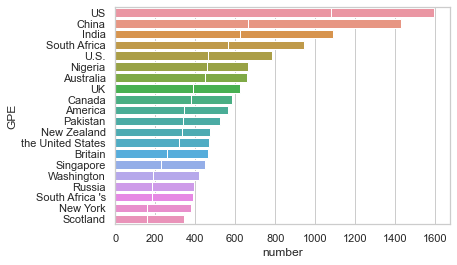

In [170]:
# ALl PoS plots for DF2
entities3=all_entity_count(nowDF3)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="number", y= "Entity", data=entities3[0])
ax = sns.barplot(x="number", y= "ORG", data=entities3[1])
ax = sns.barplot(x="number", y= "GPE", data=entities3[2])
#ax = sns.barplot(x="number", y= "NORP", data=entities3[3])
#ax = sns.barplot(x="number", y= "LAW", data=entities3[4])
